# Basic Arithmetic

This notebook will be used as an introduction to the basic syntax of julia. If you have any experience with Python or Matlab then much of this should seem quite familiar. We will start, as is allways the case, with hello world...

In [1]:
println("Hello, World")

Hello, World


We can define variables quickly and easilly just as we would in Python as well as use intuitive basic arithmetic such as +, -, *, / and ^ (Not $**$ as in Python).

In [8]:
a = 24
b = a/6
println(a, ", ",b)

24, 4.0


When using the notebook we can also use unicode characters for variable names for example $\alpha$ by typing "\\alpha" and TAB completing or using the actual code. Functions are also overloaded to use unicode characters

In [19]:
α = 36
β = α ÷ 5
println(α, ", ", β)

36, 7


You will have noticed that while the above divisions are easilly divisable, using the / method will always result in floating point division, whereas using the unicode character will only do integer division, even if using floating point variables

We can also substitute variables into strings using the $ symbol

In [20]:
a = 2
string  = "This is a string with the number $a in it"

"This is a string with the number 2 in it"

# Basic Types

The precision of a variable will be dependent on your architecture but it can be specified by passing a value to a method (all available under tab completion)

In [26]:
a = 4
b = float16(4)

println(typeof(a), ",", typeof(b))

Int64,Float16


Note the type conversion method does not have a capital letter, this is the name of the type.

There is also an arbritary precision type than machine precision which can be defined using big()

In [29]:
a = big(4)
typeof(a)

BigInt (constructor with 10 methods)

# Arrays

We can also define arrays quickly and easilly with no added packages, using different deliiting characters for columns and rows. Spaces indicates column seperation and semicolons indicate row seperation. (NOTE INDEXING IN JULIA STARTS AT 1 NOT 0)

In [11]:
arr1 = [1 2 3; 4 5 6]

2x3 Array{Int64,2}:
 1  2  3
 4  5  6

We can see above that the result is an array of type integer (the particular integer type is dependent of the architecture of your machine), and of dimension 2

Vectors can be defined using comma seperation

In [12]:
vec1 = [1.,2,3]

3-element Array{Float64,1}:
 1.0
 2.0
 3.0

Which we can see is now a floating point array with dimension 1. Julia automatically detects the best type to use.

In [33]:
strangearr = ["Hello" 2 "the world"]

1x3 Array{Any,2}:
 "Hello"  2  "the world"

Arrays can be sliced as you would expect, however the end of an array is specified with end, not -1 as in python

In [40]:
arr = [1, 2, 3, 4, 5, 6]
subarr1 = arr[3:4]

2-element Array{Int64,1}:
 3
 4

In [41]:
subarr2 = arr[2:end-1]

4-element Array{Int64,1}:
 2
 3
 4
 5

Arrays are dynamic, and can be pushed into using the push!() method or appended with the append!() method. Note that the type of an array is not dynamic and it cannot aquire new members of different types. To do this, define the type of the array using T[1, 2, 3] where T is the desired type (remember that the Any type contains all types)

In [42]:
push!(arr, 1)

7-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
 1

In [43]:
append!(arr, [3, 2, 1])

10-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
 1
 3
 2
 1

Operations on arrays are not elementwise in general. Julia uses the matlab convention of prepending operations with a . for elementwise operations. Transposes can be accesed with '

In [46]:
arr = [1, 2, 3]
arr .* arr

3-element Array{Int64,1}:
 1
 4
 9

In [48]:
arr' * arr

1-element Array{Int64,1}:
 14

Remember that unicode chars like \cdot and \times both work as a dot and cross product

# Other Useful Types

Complex and rational numbers are built into Julia and can be accessed using im and //

In [31]:
compl = 1 + im
rat = 1//2
println(typeof(compl),", ",typeof(rat))

Complex{Int64}, Rational{Int64}


# Control flow

White space in Julia means nothing as opposed to python, therefore loops and ifs require ends

In [50]:
i = 0
while i < 5
    println(i)
    i += 1
end

0
1
2
3
4


In [52]:
for i in 0:4
    println(i)
end

0
1
2
3
4


Note that 1:3 is not an array, it is a special type unit range. To use arrays then do as below

In [56]:
arr = collect(0:4)
println(arr)
for i in arr
    println(i)
end

[0,1,2,3,4]
0
1
2
3
4


If statement are intuitive

In [57]:
for i in 0:4
    if i == 2
        println(i)
    end
end

2


# Functions

Simple functions can be written inline

In [58]:
f(x) = 1 + 4x

f (generic function with 1 method)

In [59]:
f(2)

9

Julia does not require the multiplication method for this and does not require a return statement. Without a return statement Julia will return the last value that was calculated, of course and explicit return statement can be used

Longer functions can be defined as below

In [60]:
function g(a, b)
    c = rand() * b
    d = c^a
end

g (generic function with 1 method)

In [61]:
g(2,4)

0.9841976344864111

We can look at any defined methods or function usind the methods method. Built in functions will provide a link to the definitions

In [63]:
methods(g)

# 1 method for generic function "g":
g(a,b) at In[60]:2

In [64]:
methods(cross)

# 1 method for generic function "cross":
cross(a::AbstractArray{T,1},b::AbstractArray{T,1}) at linalg/generic.jl:27

Notice that the cross method has listed types for its parameters, whereas ours does not. This is because our method will take the Any type unless we specify otherwise.

In [65]:
function g2(a::FloatingPoint, b::FloatingPoint)
    c = rand() * b
    d = c^a
end

methods(g2)

# 1 method for generic function "g2":
g2(a::FloatingPoint,b::FloatingPoint) at In[65]:2

We can also find methods that take certain types with the methodswith method

In [66]:
methodswith(Int64)

188-element Array{Method,1}:
 repmat(a::AbstractArray{T,1},m::Int64) at abstractarray.jl:987                                   
 repmat(a::Union(AbstractArray{T,1},AbstractArray{T,2}),m::Int64) at abstractarray.jl:973         
 repmat(a::Union(AbstractArray{T,1},AbstractArray{T,2}),m::Int64,n::Int64) at abstractarray.jl:973
 similar{T}(a::Array{T,1},m::Int64) at array.jl:111                                               
 similar{T}(a::Array{T,2},m::Int64) at array.jl:114                                               
 airyx(k::Int64,z::Complex{Float64}) at special/bessel.jl:93                                      
 set_bigfloat_precision(x::Int64) at mpfr.jl:568                                                  
 hash(x::Int64,h::Uint64) at hashing.jl:60                                                        
 trailing_zeros(x::Int64) at int.jl:233                                                           
 <(x::Int64,y::Int64) at int.jl:247                                                               
 <(x::Float64,y::Int64) at float.jl:178                                                           
 <(x::Int64,y::Float64) at float.jl:180                                                           
 <(x::Float32,y::Int64) at float.jl:183                                                           
 ⋮                                                                                                
 oct(x::Char,p::Int64) at intfuncs.jl:261                                                         
 oct(x::Integer,p::Int64) at intfuncs.jl:263                                                      
 ==(x::Float64,y::Int64) at float.jl:168                                                          
 ==(x::Int64,y::Float64) at float.jl:170                                                          
 ==(x::Float32,y::Int64) at float.jl:173                                                          
 ==(x::Int64,y::Float32) at float.jl:175                                                          
 parseint(c::Char,base::Integer,a::Int64) at string.jl:1484                                       
 +(x::Int64,y::Int64) at int.jl:33                                                                
 mod2pi(x::Int64) at math.jl:354                                                                  
 Array{T}(::Type{T},m::Int64) at base.jl:226                                                      
 Array{T}(::Type{T},m::Int64,n::Int64) at base.jl:228                                             
 Array{T}(::Type{T},m::Int64,n::Int64,o::Int64) at base.jl:230

# Files

Basic input and output is easy, we simply open a stream and we can print to it as we do the stdout

In [3]:
outfile = open("outtest.txt", "w")
println(outfile, "This is a file write")
close(outfile)

In [6]:
infile = open("outtest.txt", "r")
lines = readlines(infile)
close(infile)
lines

1-element Array{Union(UTF8String,ASCIIString),1}:
 "This is a file write\n"

We can read and write arrays as data even more easilly

In [17]:
arr = readdlm("dat.txt")

201x5 Array{Float64,2}:
 3.5   0.000112128  0.0487974  0.000545818  -0.660368
 3.49  0.000114023  0.0495844  0.000532472  -0.662889
 3.48  0.000116247  0.0500274  0.00054961   -0.66487 
 3.47  0.000118043  0.0507657  0.00054868   -0.667649
 3.46  0.000120362  0.0502661  0.000557468  -0.669491
 3.45  0.000121039  0.0505524  0.000560066  -0.673057
 3.44  0.00012745   0.0510202  0.000558522  -0.675708
 3.43  0.000123557  0.0509297  0.000566048  -0.677931
 3.42  0.000126512  0.0512843  0.000573482  -0.680688
 3.41  0.000127708  0.0513921  0.000570771  -0.683322
 3.4   0.00013223   0.0517467  0.000586531  -0.685907
 3.39  0.000134207  0.0517399  0.000575348  -0.689142
 3.38  0.000133705  0.0518661  0.000580012  -0.691536
 ⋮                                                   
 1.61  1.76108e-5   0.978815   0.000271218  -1.92564 
 1.6   1.70064e-5   0.979542   0.000265324  -1.92798 
 1.59  1.62134e-5   0.980373   0.000252414  -1.93068 
 1.58  1.55264e-5   0.981135   0.000244068  -1.93321 
 1.5

In [19]:
col2 = arr[:,2]
writedlm("dat2.txt", col2)

#Excercise 1: Fibbonacci Sequence

Write a function which creates a generalised Fibonacci sequence which takes any two numbers and uses them as the first two numbers of a 1000 long sequence.

Your function should write the values to a file and return the ratio between the last and second to last values of the sequence

# Plotting

## Pyplot

There are a number of options for plotting figures in Julia. Here we will show 2 of them, PyPlot and Gadfly

We can call the matplotlib plotting functions from Python using the PyPlot package. This is added to julia using the Pkg.add("PyPlot") command, and then can be used with using PyPlot

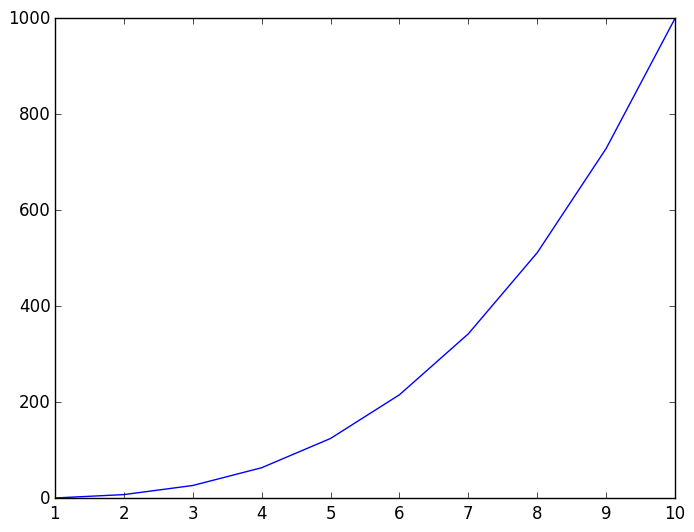

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x10e2c4b10>

In [25]:
using PyPlot

x = collect(1:10)
plot(x, x.^3)

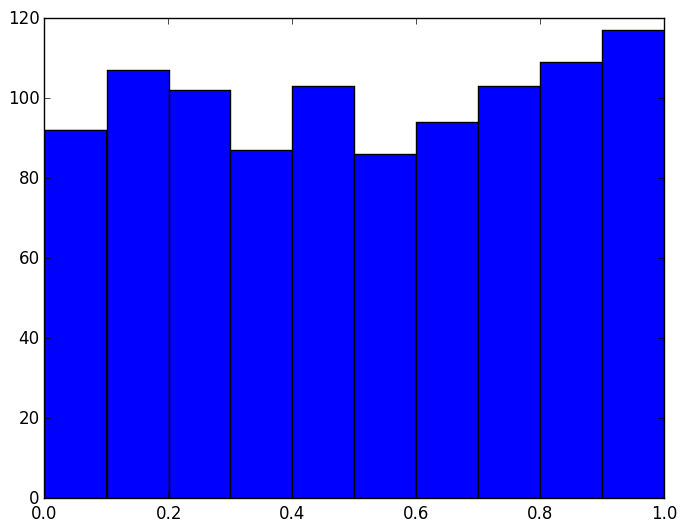

([92.0,107.0,102.0,87.0,103.0,86.0,94.0,103.0,109.0,117.0],[0.000368773,0.100296,0.200224,0.300152,0.400079,0.500007,0.599934,0.699862,0.799789,0.899717,0.999645],{PyObject <matplotlib.patches.Rectangle object at 0x1122eeed0>,PyObject <matplotlib.patches.Rectangle object at 0x1122fc550>,PyObject <matplotlib.patches.Rectangle object at 0x1122fcbd0>,PyObject <matplotlib.patches.Rectangle object at 0x11230a290>,PyObject <matplotlib.patches.Rectangle object at 0x11230a910>,PyObject <matplotlib.patches.Rectangle object at 0x11230af90>,PyObject <matplotlib.patches.Rectangle object at 0x112316650>,PyObject <matplotlib.patches.Rectangle object at 0x112316cd0>,PyObject <matplotlib.patches.Rectangle object at 0x112322390>,PyObject <matplotlib.patches.Rectangle object at 0x112322a10>})

In [38]:
dist = rand(1000)
plt.hist(dist)

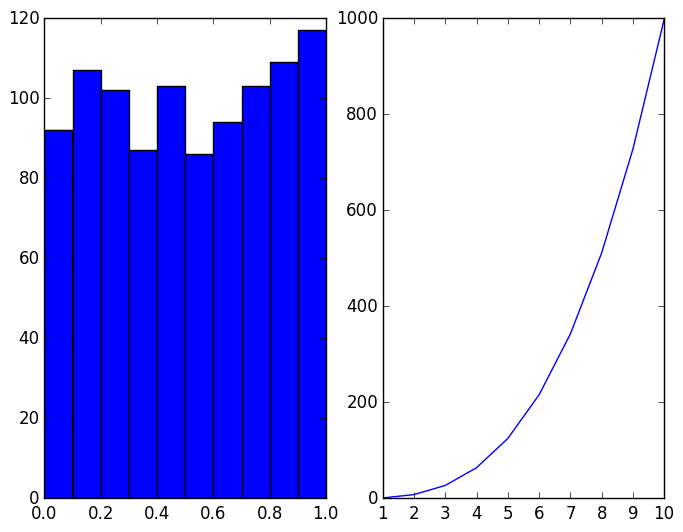

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1129d2ad0>

In [41]:
subplot(121)
plt.hist(dist)
subplot(122)
plot(x, x.^3)

## Gadfly

There is also a plotting package built specifically for Julia called Gadfly. This can be added using Pkg.add("Gadfly")

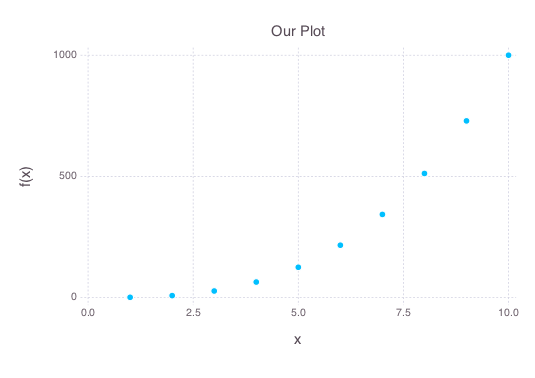

In [2]:
using Gadfly

plot2 = plot(
    x=1:10,
    y=x.^3,
    Guide.ylabel("f(x)"), # label for y-axis
    Guide.xlabel("x"),  # label for x-axis
    Guide.title("Our Plot")  # a title
    )

We can use a line rather than points if we so wish using the Geom parameter

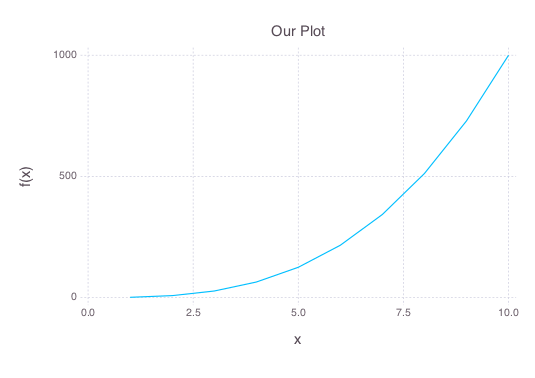

In [6]:
plot2 = plot(
    x=1:10,
    y=x.^3,
    Guide.ylabel("f(x)"), # label for y-axis
    Guide.xlabel("x"),  # label for x-axis
    Guide.title("Our Plot"),  # a title
    Geom.line
    )

We can also plot histograms using the Geom argument

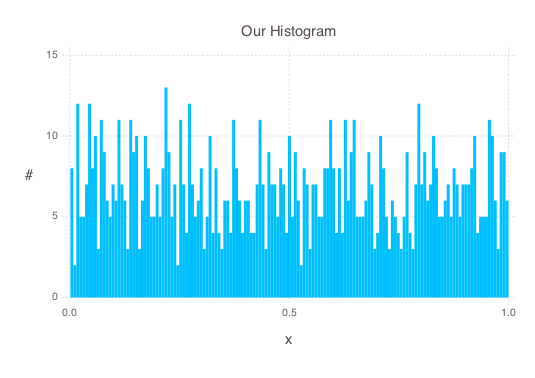

In [7]:
plot2 = plot(
    x=rand(1000),
    Guide.ylabel("#"), # label for y-axis
    Guide.xlabel("x"),  # label for x-axis
    Guide.title("Our Histogram"),  # a title
    Geom.histogram
    )

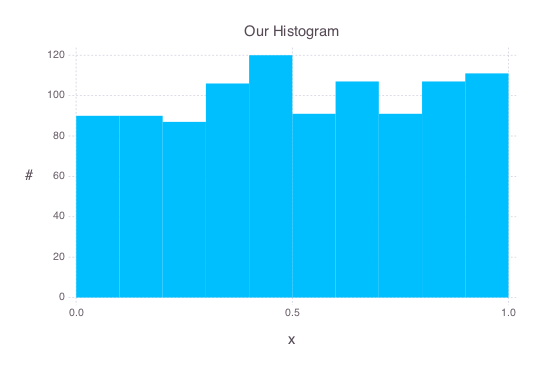

In [10]:
plot2 = plot(
    x=rand(1000),
    Guide.ylabel("#"), # label for y-axis
    Guide.xlabel("x"),  # label for x-axis
    Guide.title("Our Histogram"),  # a title
    Guide.yticks(ticks=[0:20:120]),
    Geom.histogram(bincount=10)
    )

We can also plot using a function rather than going through all of that

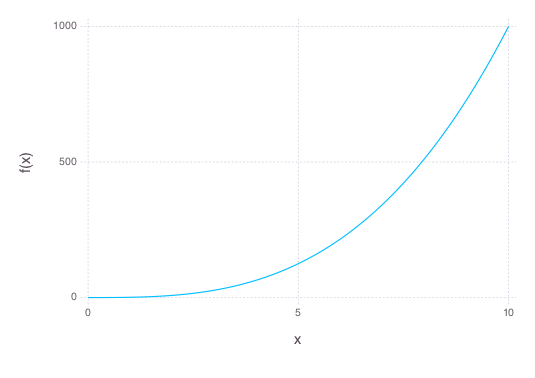

In [12]:
f(x) = x.^3

plot2 = plot(f, 0, 10)

If we want more than one plot on a figure we use layers

In [29]:
plot2 = plot(
layer(
    x=1:10,
    y=x.^3,
    Geom.line),
layer(
    x=1:10,
    y=(x-0.5).^3,
Geom.point),

    Guide.ylabel("f(x)"), # label for y-axis
    Guide.xlabel("x"),  # label for x-axis
    Guide.title("Our Plot")
    )

draw(PNG("plt.png", 16cm, 12cm),plot2)

#Calling Python

As julia is a young language, it may not contain all the functionality that you are looking for. We can solve this by importing from Python

In [30]:
using PyCall

We can call basic inline functions

In [33]:
pyeval("2+4")

6

But more usefully we can import Python modules into julia

In [35]:
@pyimport numpy as np

np.linspace(1,100)

50-element Array{Float64,1}:
   1.0    
   3.02041
   5.04082
   7.06122
   9.08163
  11.102  
  13.1224 
  15.1429 
  17.1633 
  19.1837 
  21.2041 
  23.2245 
  25.2449 
   ⋮      
  77.7755 
  79.7959 
  81.8163 
  83.8367 
  85.8571 
  87.8776 
  89.898  
  91.9184 
  93.9388 
  95.9592 
  97.9796 
 100.0    

#Calling C

We can call C functions as well, from all shared libraries. This capability is inbuilt into Julia and is accessed with ccall

In [38]:
t1 = ccall( (:clock, "libc"), Int32, ())

112251247

We can nicely wrap this into a julia function for ease

In [39]:
function ctime()
    t1 = ccall( (:clock, "libc"), Int32, ())
end

ctime()

112256120

If you run the code below you will download another notebook that can then be opened via the link...

In [ ]:
run(`wget https://raw.githubusercontent.com/josh-gree/juliafiles/master/Fractal-timing-Julia-vs-Python.ipynb`)

Link to [Benchmarks -  julia sets](Fractal-timing-Julia-vs-Python.ipynb)